<a href="https://colab.research.google.com/github/krmayank01/Loan-Default-Prediction/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Defaults In Peer-To-Peer Lending**


# **Overview**

---


In this project, we will analyze a dataset containing data on potential borrowers. The goal of this project is to build a model predicting the loan default of potential borrowers.




# **Importing Important Library and connecting drive**

---



In [1]:
#Load the necessary python libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, r2_score, f1_score, roc_curve, PrecisionRecallDisplay , precision_recall_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
try:
  Working_dir="/content/drive/MyDrive/Lending_Club_Data"
  loan_df=pd.read_csv(Working_dir+"/LoanStats3a.csv",skiprows=1,low_memory=False)
  print("The loan dataset has {} samples with {} features.".format(*loan_df.shape))
except:
    print("The loan dataset could not be loaded. Is the dataset missing?")

The loan dataset has 42538 samples with 111 features.


In [12]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_df.iloc[0]

id                              1077501
member_id                     1296599.0
loan_amnt                        5000.0
funded_amnt                      5000.0
funded_amnt_inv                  4975.0
                                ...    
tax_liens                           0.0
tot_hi_cred_lim                     NaN
total_bal_ex_mort                   NaN
total_bc_limit                      NaN
total_il_high_credit_limit          NaN
Name: 0, Length: 111, dtype: object

# **Column Information**

---
:id:-A unique LC assigned ID for the loan listing.

1:member_id:-A unique LC assigned Id for the borrower member.

2:loan_amnt:-The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

3:funded_amnt:-The total amount committed to that loan at that point in time.

4:funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.

5:term:-The number of payments on the loan. Values are in months and can be either 36 or 60.

6:int_rate:-Interest Rate on the loan

7:installment:-The monthly payment owed by the borrower if the loan originates.

8:grade:-LC assigned loan grade

9:sub_grade:-LC assigned loan subgrade

10:emp_title:-The job title supplied by the Borrower when applying for the loan.*

11:emp_length:-Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

12:home_ownership:-The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

13:annual_inc:-The self-reported annual income provided by the borrower during registration.

14:verification_status:-Indicates if income was verified by LC, not verified, or if the income source was verified

15:issue_d:-The month which the loan was funded

16:loan_status:-Current status of the loan

17:pymnt_plan:-Indicates if a payment plan has been put in place for the loan

18:url:-URL for the LC page with listing data.

19:desc:-Loan description provided by the borrower

20:purpose:-A category provided by the borrower for the loan request.

21:title:-The loan title provided by the borrower

22:zip_code:-The first 3 numbers of the zip code provided by the borrower in the loan application. 23:addr_state:-The state provided by the borrower in the loan application 24:dti:-A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

25:delinq_2yrs:-The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

26:earliest_cr_line:-The month the borrower's earliest reported credit line was opened

27:fico_range_low:-The lower boundary range the borrower’s FICO at loan origination belongs to.

28:fico_range_high:-The upper boundary range the borrower’s FICO at loan origination belongs to.

29:inq_last_6mths:-The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

30:mths_since_last_delinq:-The number of months since the borrower's last delinquency.

31:open_acc:-The number of open credit lines in the borrower's credit file.

32:pub_rec:-Number of derogatory public records

33:revol_bal:-Total credit revolving balance

34:revol_util:-Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

35:total_acc:-The total number of credit lines currently in the borrower's credit file

36:initial_list_status:-The initial listing status of the loan. Possible values are – W, F

37:out_prncp:-Remaining outstanding principal for total amount funded

38:out_prncp_inv:-Remaining outstanding principal for portion of total amount funded by investors

39:total_pymnt:-Payments received to date for total amount funded

40:total_pymnt_inv:-Payments received to date for portion of total amount funded by investors

41:total_rec_prncp:-Principal received to date

42:total_rec_int:-Interest received to date

43:total_rec_late_fee:-Late fees received to date

44:recoveries:-post charge off gross recovery

45:collection_recovery_fee:-post charge off collection fee

46:last_pymnt_d:-Last month payment was received

47:last_pymnt_amnt:-Last total payment amount received

48:last_credit_pull_d:-The most recent month LC pulled credit for this loan

49:last_fico_range_high:-The upper boundary range the borrower’s last FICO pulled belongs to.

50:last_fico_range_low:-The lower boundary range the borrower’s last FICO pulled belongs to.

51:collections_12_mths_ex_med:-Number of collections in 12 months excluding medical collections

52:policy_code:-publicly available policy_code=1

new products not publicly available policy_code=2

53:application_type:-Indicates whether the loan is an individual application or a joint application with two co-borrowers

54:acc_now_delinq:-The number of accounts on which the borrower is now delinquent.

55:chargeoff_within_12_mths:-Number of charge-offs within 12 months

56:delinq_amnt:-The past-due amount owed for the accounts on which the borrower is now delinquent.

57:pub_rec_bankruptcies:-Number of public record bankruptcies

58:tax_liens:-Number of tax liens


# Looking for Some More information

In [6]:
loan_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


some column contain only single value through out dataset. We could drop them latter.

In [7]:
loan_df["loan_status"].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

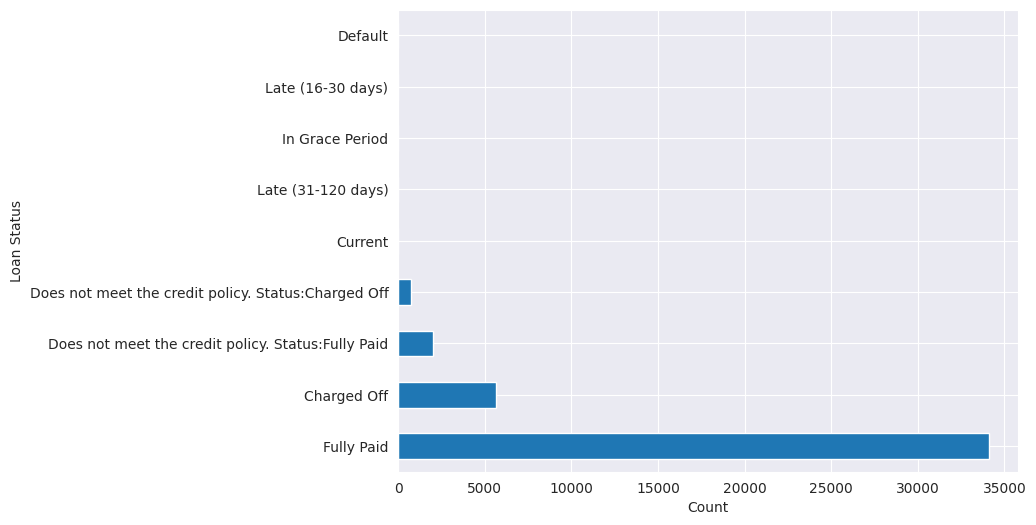

In [8]:
# Plot Loan Status
plt.figure(figsize= (8,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
loan_df['loan_status'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

**Here loan status has nine different possible values**! Let’s learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we’ll be dealing with.

**Fully Paid**->Loan has been fully paid off.

**Charged off**->Loan for which there is no longer a reasonable expectation of further payments.

**Does not meet the credit policy. Status:Fully Paid**--> While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

**Does not meet the credit policy. Status:charged off**->While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

**Current**->Loan is up to date on current payments.,

**In Grace period**->The loan is past due but still in the grace period of 15 days.

**Late(30-120)**->Loan hasn't been paid in 31 to 120 days (late on the current payment).

**Late(16-30)**->Loan hasn't been paid in 16 to 30 days (late on the current payment).

**Default**->Loan is defaulted on and no payment has been made for more than 121 days.

In [9]:
loan_df=loan_df[loan_df["loan_status"]!='Current']
loan_df.dropna(subset=['loan_status'],inplace=True)
loan_df=loan_df.reset_index()
del loan_df['index']

Current status coustemer are treated separately because we don't how they behave so we need to predict thenm by our model.

In [10]:
# Encoding the loan status variable
dct = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
loan_df = loan_df.replace(dct)

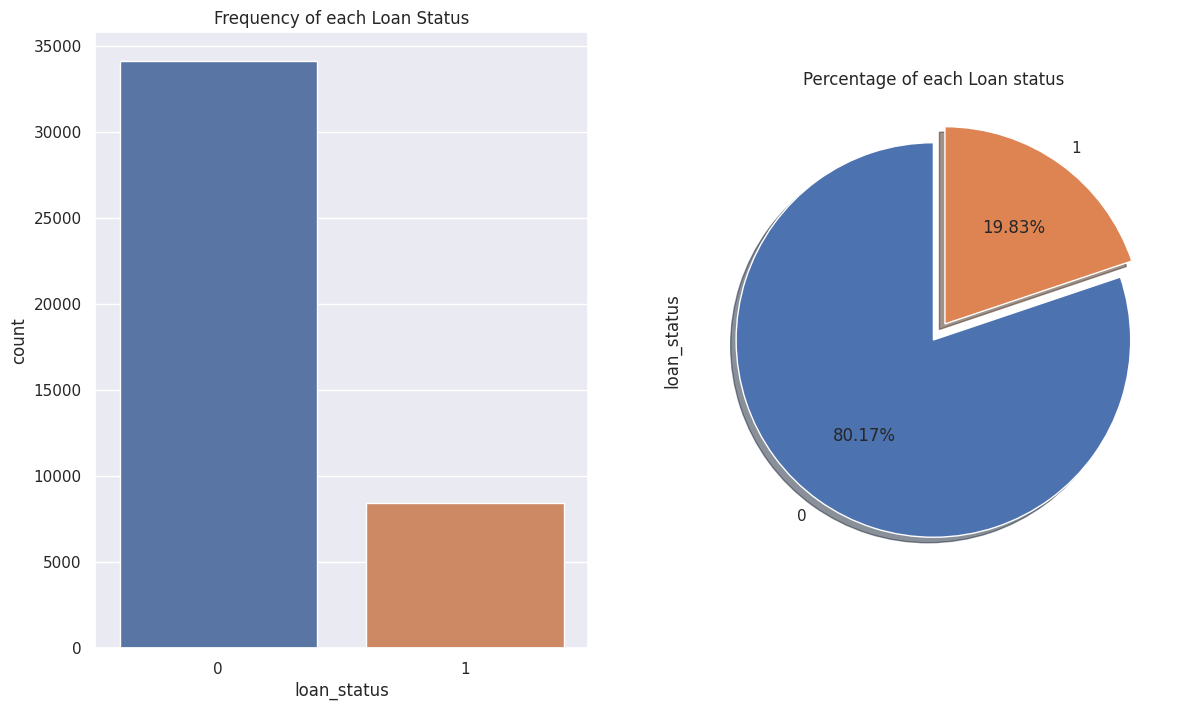

In [11]:
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='loan_status',data=loan_df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

This clearly is a case of an imbalanced class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

**Here, We have finalize loan status as our target variable which has now 19.8% are defaulters for the loan payment**.

# **Exploratory Data Analysis(EDA)**

---



---

